# Land Average Temperature by Year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

First, we need to access the appropriate data, and create a column for the year so we can access this feature later.

In [2]:
df = pd.read_csv("data/GlobalTemperatures.csv")
df["dt"] = pd.to_datetime(df["dt"]) # converting to datetime to simplify next line's year access
df = df.assign(year=df["dt"].dt.year)

In [3]:
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750
...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015


Let's create a new DataFrame called per_year which takes our previous DataFrame and finds the average temperature for each year from the daily values.

In [4]:
per_year = df.groupby("year").mean(numeric_only=True)

Now, let's plot use the LandAverageTemperature column to plot the annual average. We'll also use NumPy's polynomial fit to add a regression line. 

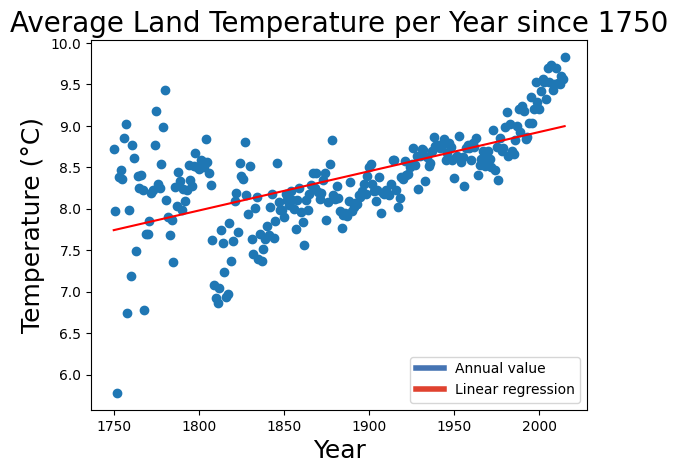

In [5]:
# calculate linear regression line
x = per_year.index
y = per_year["LandAverageTemperature"]
z = np.polyfit(x, y, 1) # polynomial fit of degree 1 (linear fit)
p = np.poly1d(z)

plt.scatter(x, y)
plt.plot(x, p(x), "r")

plt.title("Average Land Temperature per Year since 1750",  fontsize=20)
plt.xlabel("Year",  fontsize=18)
plt.ylabel("Temperature (°C)",  fontsize=18)

# adapted from https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
cmap = plt.cm.RdYlBu
custom_lines = [Line2D([0], [0], color=cmap(0.9), lw=4),
                Line2D([0], [0], color=cmap(0.13), lw=4)]
plt.legend(custom_lines, ["Annual value", "Linear regression"])

plt.show()

This upward trend is interesting! Let's make a line graph to see the progression better over time.

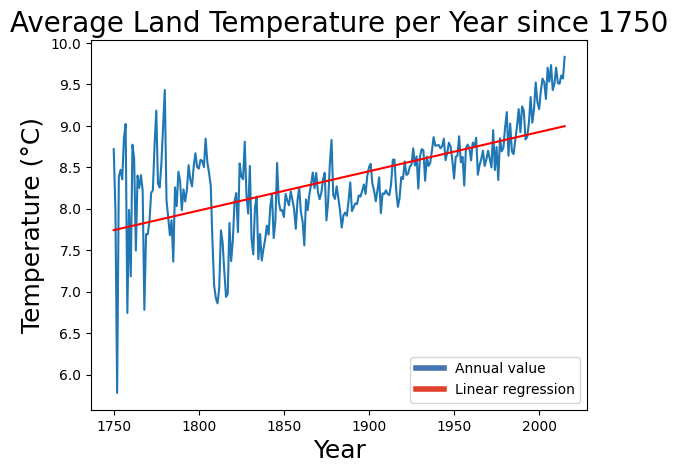

In [6]:
# calculate linear regression line
x = per_year.index
y = per_year["LandAverageTemperature"]
z = np.polyfit(x, y, 1) # polynomial fit of degree 1 (linear fit)
p = np.poly1d(z)

per_year.plot(y="LandAverageTemperature")
plt.plot(x, p(x), "r")

plt.title("Average Land Temperature per Year since 1750",  fontsize=20)
plt.xlabel("Year",  fontsize=18)
plt.ylabel("Temperature (°C)",  fontsize=18)

# adapted from https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
cmap = plt.cm.RdYlBu
custom_lines = [Line2D([0], [0], color=cmap(0.9), lw=4),
                Line2D([0], [0], color=cmap(0.13), lw=4)]
plt.legend(custom_lines, ["Annual value", "Linear regression"])

plt.show()

The linear regression does a decent job at following our curve, but we can increase the degree of the polynomial to create a better fit.

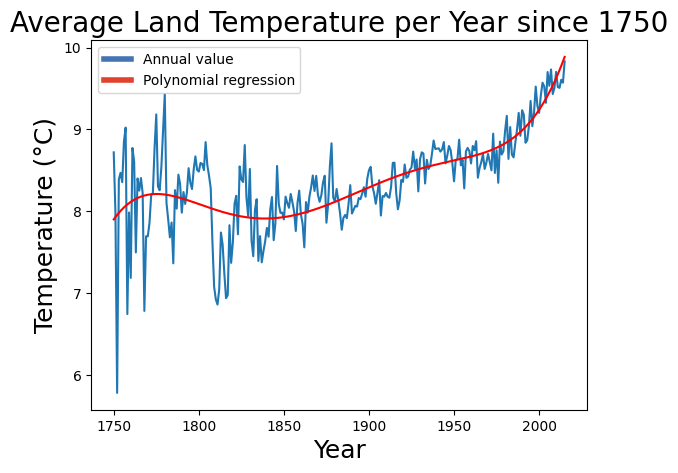

In [7]:
x = per_year.index
y = per_year["LandAverageTemperature"]
z = np.polyfit(x, y, 5) # polynomial fit of degree 5 (nonlinear fit)
p = np.poly1d(z)

per_year.plot(y="LandAverageTemperature")
plt.plot(x, p(x), "r")

plt.title("Average Land Temperature per Year since 1750",  fontsize=20)
plt.xlabel("Year",  fontsize=18)
plt.ylabel("Temperature (°C)",  fontsize=18)

# adapted from https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
cmap = plt.cm.RdYlBu
custom_lines = [Line2D([0], [0], color=cmap(0.9), lw=4),
                Line2D([0], [0], color=cmap(0.13), lw=4)]
plt.legend(custom_lines, ["Annual value", "Polynomial regression"])

plt.show()

This looks good, but the data from the earlier years is inconsistent, indicating that this data may be less reliable. Let's create a new DataFrame that omits the years prior to 1900, and create new visualizations from the remaining years.

In [8]:
modern = per_year[per_year.index >= 1900]

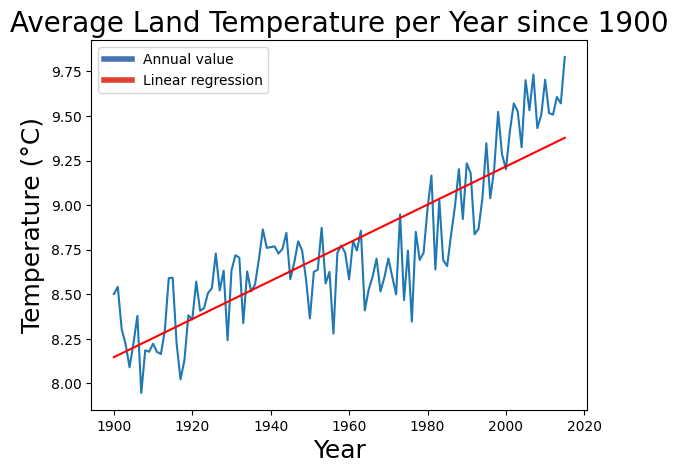

In [9]:
# calculate linear regression line
x = modern.index
y = modern["LandAverageTemperature"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

modern.plot(y="LandAverageTemperature")
plt.plot(x, p(x), "r")

plt.title("Average Land Temperature per Year since 1900",  fontsize=20)
plt.xlabel("Year",  fontsize=18)
plt.ylabel("Temperature (°C)",  fontsize=18)

# adapted from https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
cmap = plt.cm.RdYlBu
custom_lines = [Line2D([0], [0], color=cmap(0.9), lw=4),
                Line2D([0], [0], color=cmap(0.13), lw=4)]
plt.legend(custom_lines, ["Annual value", "Linear regression"])

plt.show()

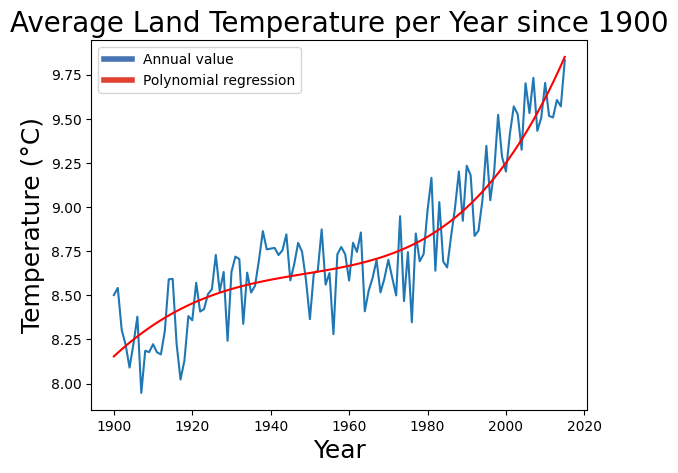

In [10]:
x = modern.index
y = modern["LandAverageTemperature"]
z = np.polyfit(x, y, 4)
p = np.poly1d(z)

modern.plot(y="LandAverageTemperature")
plt.plot(x, p(x), "r")

plt.title("Average Land Temperature per Year since 1900",  fontsize=20)
plt.xlabel("Year",  fontsize=18)
plt.ylabel("Temperature (°C)",  fontsize=18)

# adapted from https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
cmap = plt.cm.RdYlBu
custom_lines = [Line2D([0], [0], color=cmap(0.9), lw=4),
                Line2D([0], [0], color=cmap(0.13), lw=4)]
plt.legend(custom_lines, ["Annual value", "Polynomial regression"])

plt.show()

In both graph's with the higher-degree polynomial regression, we can see that the global temperature is not only increasing, but that the rate of increase (the derivative) is itself also increasing! Let's see what happens if we extend this trendline out to predict the average temperature in 2030

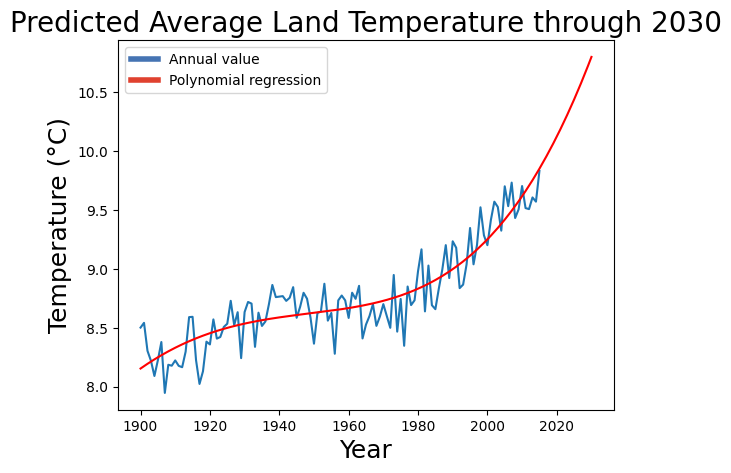

In [11]:
x = modern.index
y = modern["LandAverageTemperature"]
z = np.polyfit(x, y, 4)
p = np.poly1d(z)

modern.plot(y="LandAverageTemperature")
years = np.arange(1900, 2031)
plt.plot(years, p(years), "r") # Since we are using a different range, we have to use years instead of x

plt.title("Predicted Average Land Temperature through 2030", fontsize=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Temperature (°C)", fontsize=18)

# adapted from https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
cmap = plt.cm.RdYlBu
custom_lines = [Line2D([0], [0], color=cmap(0.9), lw=4),
                Line2D([0], [0], color=cmap(0.13), lw=4)]
plt.legend(custom_lines, ["Annual value", "Polynomial regression"])

plt.show()

Again, here we can see that the global land temperature is expected to increase significantly, as is the rate of said increase. It is important to consider that this is a polynomial regression, so this rate may be inaccurate. Still, it appears to be an accurate representation when placed next to the actual values.